In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Set Data Directory Path
data_dir = r"c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data"
file_path = os.path.join(data_dir, "dim__notion_clients__anonymized.csv")

# Verify file exists
if os.path.exists(file_path):
    print(f"✓ File found: {file_path}")
    print(f"File size: {os.path.getsize(file_path)} bytes")
else:
    print(f"✗ File not found: {file_path}")

✓ File found: c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data\dim__notion_clients__anonymized.csv
File size: 5535 bytes


In [3]:
# Load Client Data
try:
    df_clients = pd.read_csv(file_path)
    print("✓ Data loaded successfully!")
    print(f"Dataset shape: {df_clients.shape}")
except Exception as e:
    print(f"✗ Error loading data: {e}")

✓ Data loaded successfully!
Dataset shape: (48, 10)


In [4]:
# Basic Information
print("=== BASIC INFORMATION ===")
print(f"Shape: {df_clients.shape}")
print(f"Columns: {list(df_clients.columns)}")
print(f"Data types:\n{df_clients.dtypes}")
print(f"\nMemory usage: {df_clients.memory_usage(deep=True).sum() / 1024:.2f} KB")

=== BASIC INFORMATION ===
Shape: (48, 10)
Columns: ['client_id', 'category', 'industry_id', 'company_size', 'company_type', 'n_roles', 'n_projects', 'n_people', 'started_at', 'name_anon']
Data types:
client_id       object
category        object
industry_id     object
company_size    object
company_type    object
n_roles          int64
n_projects       int64
n_people         int64
started_at      object
name_anon       object
dtype: object

Memory usage: 22.82 KB


In [5]:
# First Few Rows
print("=== FIRST 5 ROWS ===")
display(df_clients.head())

print("\n=== LAST 5 ROWS ===")
display(df_clients.tail())

=== FIRST 5 ROWS ===


,client_id,category,industry_id,company_size,company_type,n_roles,n_projects,n_people,started_at,name_anon
0,2f0a5150-aeeb-49f7-b11b-5307511068ff,Internal,NaN,NaN,NaN,0,1,0,NaN,"Smith, Fields and Bentley"
1,2dc74fac-c75a-4770-855f-9943969f18e3,Internal,NaN,NaN,NaN,0,2,0,NaN,Ryan-Ward
2,3d619f69-ee9c-41f8-ac3a-ac5cc851cf10,Internal,NaN,NaN,NaN,0,3,0,NaN,Edwards-Jenkins
3,87163a01-08e8-487c-b200-6f04138c53bf,Internal,NaN,NaN,NaN,0,3,0,NaN,Avila LLC
4,0a1a94ab-d574-4c92-9b69-b21df5080288,Internal,NaN,NaN,NaN,0,3,0,NaN,Adams Group



=== LAST 5 ROWS ===


,client_id,category,industry_id,company_size,company_type,n_roles,n_projects,n_people,started_at,name_anon
43,d6cd8164-a355-4b4a-a506-02eb9b34ba74,Clients,bd0cfcaf-af99-43d4-ba60-13c50a85e0a4,>250,Public,4,2,1,2024-03-04,Joseph and Sons
44,f63533d5-5060-47e1-99bc-80a305f94471,Clients,bc16a6d1-34a7-46aa-b12d-0b014750385d,25-249,Private,6,2,5,2023-01-23,Cooper LLC
45,43db11b5-8688-4831-930a-b2a5ed51e717,Clients,f99a9738-1f86-48ec-b212-28ec0ad4c8e4,25-249,Private,7,1,0,2022-04-18,Jones-Willis
46,b7799cf5-ea66-4fcf-b705-630819a8ec8c,Clients,778f29ec-9e94-4438-81ac-a85c7022b22f,>250,Public,10,1,0,2022-04-01,Sullivan PLC
47,0b539912-e3de-480a-8e64-1acf6c0b03b3,Clients,f99a9738-1f86-48ec-b212-28ec0ad4c8e4,>250,Private,12,6,0,2021-10-04,Ortega Group


In [7]:
#there is a possible join between this and the roles tables(potentially adding information about projects/hours/money)
df_clients.name_anon.value_counts()

name_anon
Terry and Sons                     2
Ryan-Ward                          1
Smith, Fields and Bentley          1
Edwards-Jenkins                    1
Avila LLC                          1
Adams Group                        1
Diaz and Sons                      1
Dixon and Sons                     1
Martinez Group                     1
Wagner, King and Lewis             1
Fernandez, Brewer and Vasquez      1
Lee, Freeman and Jones             1
Robinson, Kaufman and Mills        1
Pineda-Carter                      1
Rivera, Davis and Roberts          1
Stokes, Harrison and Goodman       1
Park, Elliott and Castillo         1
Robinson-Gilbert                   1
Miller, Swanson and Black          1
Rice, Strickland and Soto          1
Dudley and Sons                    1
Reed, Berry and Wilkins            1
Morris, Juarez and Chavez          1
Gibson, Nguyen and Graham          1
Harris, Watson and Donaldson       1
Harvey, Collins and Walker         1
Hernandez, Walker and Holt  

In [7]:
# Missing Values Analysis
print("=== MISSING VALUES ===")
missing_data = df_clients.isnull().sum()
missing_percent = (missing_data / len(df_clients)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Duplicates
print(f"\n=== DUPLICATES ===")
print(f"Total duplicated rows: {df_clients.duplicated().sum()}")
print(f"Percentage of duplicates: {(df_clients.duplicated().sum() / len(df_clients)) * 100:.2f}%")

=== MISSING VALUES ===
              Missing Count  Missing Percentage
industry_id              19           39.583333
company_size             18           37.500000
company_type             17           35.416667
started_at               13           27.083333
category                  4            8.333333

=== DUPLICATES ===
Total duplicated rows: 0
Percentage of duplicates: 0.00%


In [8]:
# Client Analysis - Timeline and Metrics
print("=== CLIENT ANALYSIS - COMPREHENSIVE BREAKDOWN ===")

# First, let's explore the category column to understand the filtering criteria
if 'category' in df_clients.columns:
    print("✓ category column found!")
    print("\n--- CATEGORY BREAKDOWN ---")
    category_counts = df_clients['category'].value_counts(dropna=False)
    display(category_counts)
    
    # Filter for only "Clients" category
    clients_only = df_clients[df_clients['category'] == 'Clients'].copy()
    print(f"\nFiltered dataset shape (Clients only): {clients_only.shape}")
    print(f"Original dataset shape: {df_clients.shape}")
    print(f"Filtered out {len(df_clients) - len(clients_only)} non-client records")
    
else:
    print("❌ category column not found")
    print(f"Available columns: {list(df_clients.columns)}")
    clients_only = df_clients.copy()  # Use all data if Category doesn't exist

# Check required columns
required_cols = ['started_at', 'n_roles', 'n_projects', 'n_people']
existing_cols = [col for col in required_cols if col in clients_only.columns]
missing_cols = [col for col in required_cols if col not in clients_only.columns]

print(f"\n--- COLUMN AVAILABILITY CHECK ---")
print(f"✓ Available columns: {existing_cols}")
if missing_cols:
    print(f"❌ Missing columns: {missing_cols}")

# Display sample of filtered data
print(f"\n--- SAMPLE OF CLIENT DATA ---")
display(clients_only.head())

=== CLIENT ANALYSIS - COMPREHENSIVE BREAKDOWN ===
✓ category column found!

--- CATEGORY BREAKDOWN ---


category
Clients     35
Internal     9
NaN          4
Name: count, dtype: int64


Filtered dataset shape (Clients only): (35, 10)
Original dataset shape: (48, 10)
Filtered out 13 non-client records

--- COLUMN AVAILABILITY CHECK ---
✓ Available columns: ['started_at', 'n_roles', 'n_projects', 'n_people']

--- SAMPLE OF CLIENT DATA ---


,client_id,category,industry_id,company_size,company_type,n_roles,n_projects,n_people,started_at,name_anon
10,7fa223a8-390d-4d99-8766-51d0c87726bb,Clients,bd0cfcaf-af99-43d4-ba60-13c50a85e0a4,>250,Public,0,1,0,NaN,"Fernandez, Brewer and Vasquez"
11,53354996-d9a0-4312-b5d5-8ecb56a13048,Clients,NaN,NaN,NaN,1,1,0,2024-06-17,"Lee, Freeman and Jones"
12,e484733b-a243-4358-8def-b422d77cceb2,Clients,NaN,NaN,NaN,1,1,1,2024-06-24,"Robinson, Kaufman and Mills"
16,254af57c-b40e-42fb-92ed-e18cb8a36d0c,Clients,778f29ec-9e94-4438-81ac-a85c7022b22f,25-249,Private,1,1,1,2024-01-16,"Park, Elliott and Castillo"
17,0329ebb5-3e0d-488f-b7ef-da8165183aba,Clients,778f29ec-9e94-4438-81ac-a85c7022b22f,25-249,Private,1,1,0,2021-12-06,Robinson-Gilbert


=== CLIENT TIMELINE ANALYSIS ===
✓ Successfully converted started_at to datetime

Timeline dataset shape: (33, 11)
Date range: 2020-10-01 to 2025-09-04


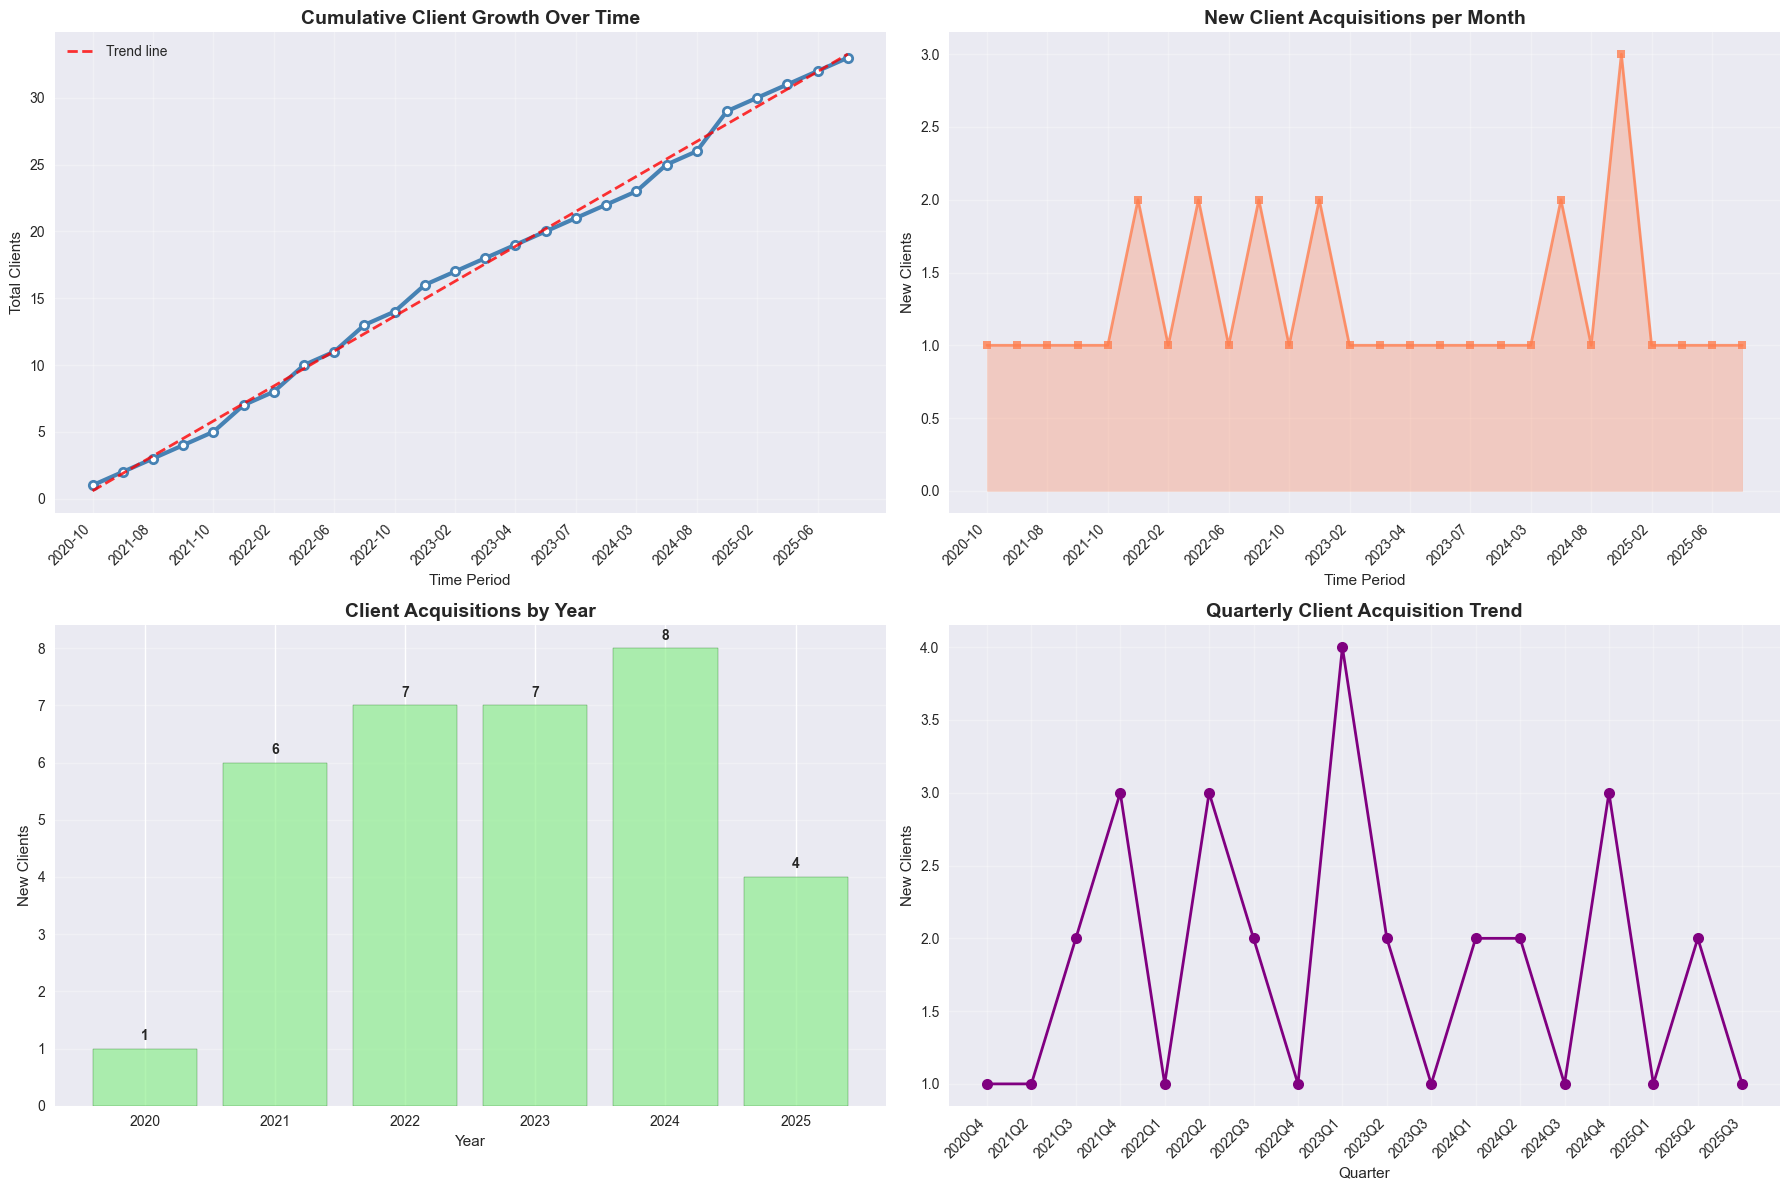

In [9]:
# Timeline Analysis of Client Start Dates
print("=== CLIENT TIMELINE ANALYSIS ===")

if 'started_at' in clients_only.columns and len(clients_only) > 0:
    # Convert started_at to datetime
    try:
        clients_only['started_at_clean'] = pd.to_datetime(clients_only['started_at'], errors='coerce')
        print("✓ Successfully converted started_at to datetime")
        
        # Check for conversion issues
        invalid_dates = clients_only[clients_only['started_at_clean'].isna() & clients_only['started_at'].notna()]
        if len(invalid_dates) > 0:
            print(f"⚠️ Found {len(invalid_dates)} invalid date entries")
        
        # Remove rows with invalid dates for timeline analysis
        timeline_data = clients_only.dropna(subset=['started_at_clean']).copy()
        timeline_data = timeline_data.sort_values('started_at_clean')
        
        if len(timeline_data) > 0:
            print(f"\nTimeline dataset shape: {timeline_data.shape}")
            print(f"Date range: {timeline_data['started_at_clean'].min().strftime('%Y-%m-%d')} to {timeline_data['started_at_clean'].max().strftime('%Y-%m-%d')}")
            
            # Create monthly and quarterly aggregations
            timeline_data['year_month'] = timeline_data['started_at_clean'].dt.to_period('M')
            timeline_data['quarter'] = timeline_data['started_at_clean'].dt.to_period('Q')
            timeline_data['year'] = timeline_data['started_at_clean'].dt.year
            
            # Monthly client acquisitions
            monthly_clients = timeline_data.groupby('year_month').size().reset_index(name='new_clients')
            monthly_clients['cumulative_clients'] = monthly_clients['new_clients'].cumsum()
            monthly_clients['period'] = monthly_clients['year_month'].astype(str)
            
            # Create comprehensive timeline visualization
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
            
            # 1. Cumulative client growth (line chart)
            ax1.plot(range(len(monthly_clients)), monthly_clients['cumulative_clients'], 
                    marker='o', linewidth=3, markersize=6, color='steelblue', 
                    markerfacecolor='white', markeredgecolor='steelblue', markeredgewidth=2)
            
            # Add trend line
            if len(monthly_clients) > 1:
                z = np.polyfit(range(len(monthly_clients)), monthly_clients['cumulative_clients'], 1)
                p = np.poly1d(z)
                ax1.plot(range(len(monthly_clients)), p(range(len(monthly_clients))), 
                        "--", alpha=0.8, color='red', linewidth=2, label='Trend line')
                ax1.legend()
            
            ax1.set_title('Cumulative Client Growth Over Time', fontsize=14, fontweight='bold')
            ax1.set_xlabel('Time Period')
            ax1.set_ylabel('Total Clients')
            ax1.grid(True, alpha=0.3)
            ax1.set_xticks(range(0, len(monthly_clients), max(1, len(monthly_clients)//10)))
            ax1.set_xticklabels([monthly_clients.iloc[i]['period'] for i in range(0, len(monthly_clients), max(1, len(monthly_clients)//10))], 
                               rotation=45, ha='right')
            
            # 2. New clients per month (line chart as requested)
            ax2.plot(range(len(monthly_clients)), monthly_clients['new_clients'], 
                    marker='s', linewidth=2, markersize=6, color='coral', alpha=0.8)
            ax2.fill_between(range(len(monthly_clients)), monthly_clients['new_clients'], 
                           alpha=0.3, color='coral')
            
            ax2.set_title('New Client Acquisitions per Month', fontsize=14, fontweight='bold')
            ax2.set_xlabel('Time Period')
            ax2.set_ylabel('New Clients')
            ax2.grid(True, alpha=0.3)
            ax2.set_xticks(range(0, len(monthly_clients), max(1, len(monthly_clients)//10)))
            ax2.set_xticklabels([monthly_clients.iloc[i]['period'] for i in range(0, len(monthly_clients), max(1, len(monthly_clients)//10))], 
                               rotation=45, ha='right')
            
            # 3. Yearly client breakdown
            yearly_clients = timeline_data.groupby('year').size()
            bars = ax3.bar(yearly_clients.index.astype(str), yearly_clients.values, 
                          color='lightgreen', alpha=0.7, edgecolor='darkgreen')
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{int(height)}', ha='center', va='bottom', fontweight='bold')
            
            ax3.set_title('Client Acquisitions by Year', fontsize=14, fontweight='bold')
            ax3.set_xlabel('Year')
            ax3.set_ylabel('New Clients')
            ax3.grid(True, alpha=0.3, axis='y')
            
            # 4. Quarterly trend
            quarterly_clients = timeline_data.groupby('quarter').size()
            ax4.plot(range(len(quarterly_clients)), quarterly_clients.values, 
                    marker='o', linewidth=2, markersize=8, color='purple')
            
            ax4.set_title('Quarterly Client Acquisition Trend', fontsize=14, fontweight='bold')
            ax4.set_xlabel('Quarter')
            ax4.set_ylabel('New Clients')
            ax4.grid(True, alpha=0.3)
            ax4.set_xticks(range(len(quarterly_clients)))
            ax4.set_xticklabels([str(q) for q in quarterly_clients.index], rotation=45, ha='right')
            
            plt.tight_layout()
            plt.show()
            
        else:
            print("❌ No valid client dates found after cleaning")
            
    except Exception as e:
        print(f"✗ Error processing started_at column: {e}")
else:
    print("❌ started_at column not found or no client data available")

In [12]:
# Check required columns
required_cols = ['started_at', 'n_roles', 'n_projects', 'n_people']
existing_cols = [col for col in required_cols if col in clients_only.columns]
missing_cols = [col for col in required_cols if col not in clients_only.columns]
available_metrics = [col for col in ['n_roles', 'n_projects', 'n_people'] if col in clients_only.columns]

print(f"\n--- COLUMN AVAILABILITY CHECK ---")
print(f"✓ Available columns: {existing_cols}")


--- COLUMN AVAILABILITY CHECK ---
✓ Available columns: ['started_at', 'n_roles', 'n_projects', 'n_people']


=== TIMELINE + METRICS CORRELATION ===

--- METRICS BY YEAR ---


n_roles           n_projects           n_people          
               count  mean sum      count  mean sum    count  mean sum
year_started                                                          
2020               1  1.00   1          1  0.00   0        1  0.00   0
2021               6  4.33  26          6  2.00  12        6  0.00   0
2022               7  3.86  27          7  0.71   5        7  0.00   0
2023               7  2.57  18          7  1.29   9        7  0.71   5
2024               8  1.88  15          8  1.62  13        8  0.62   5
2025               4  1.75   7          4  1.00   4        4  0.50   2

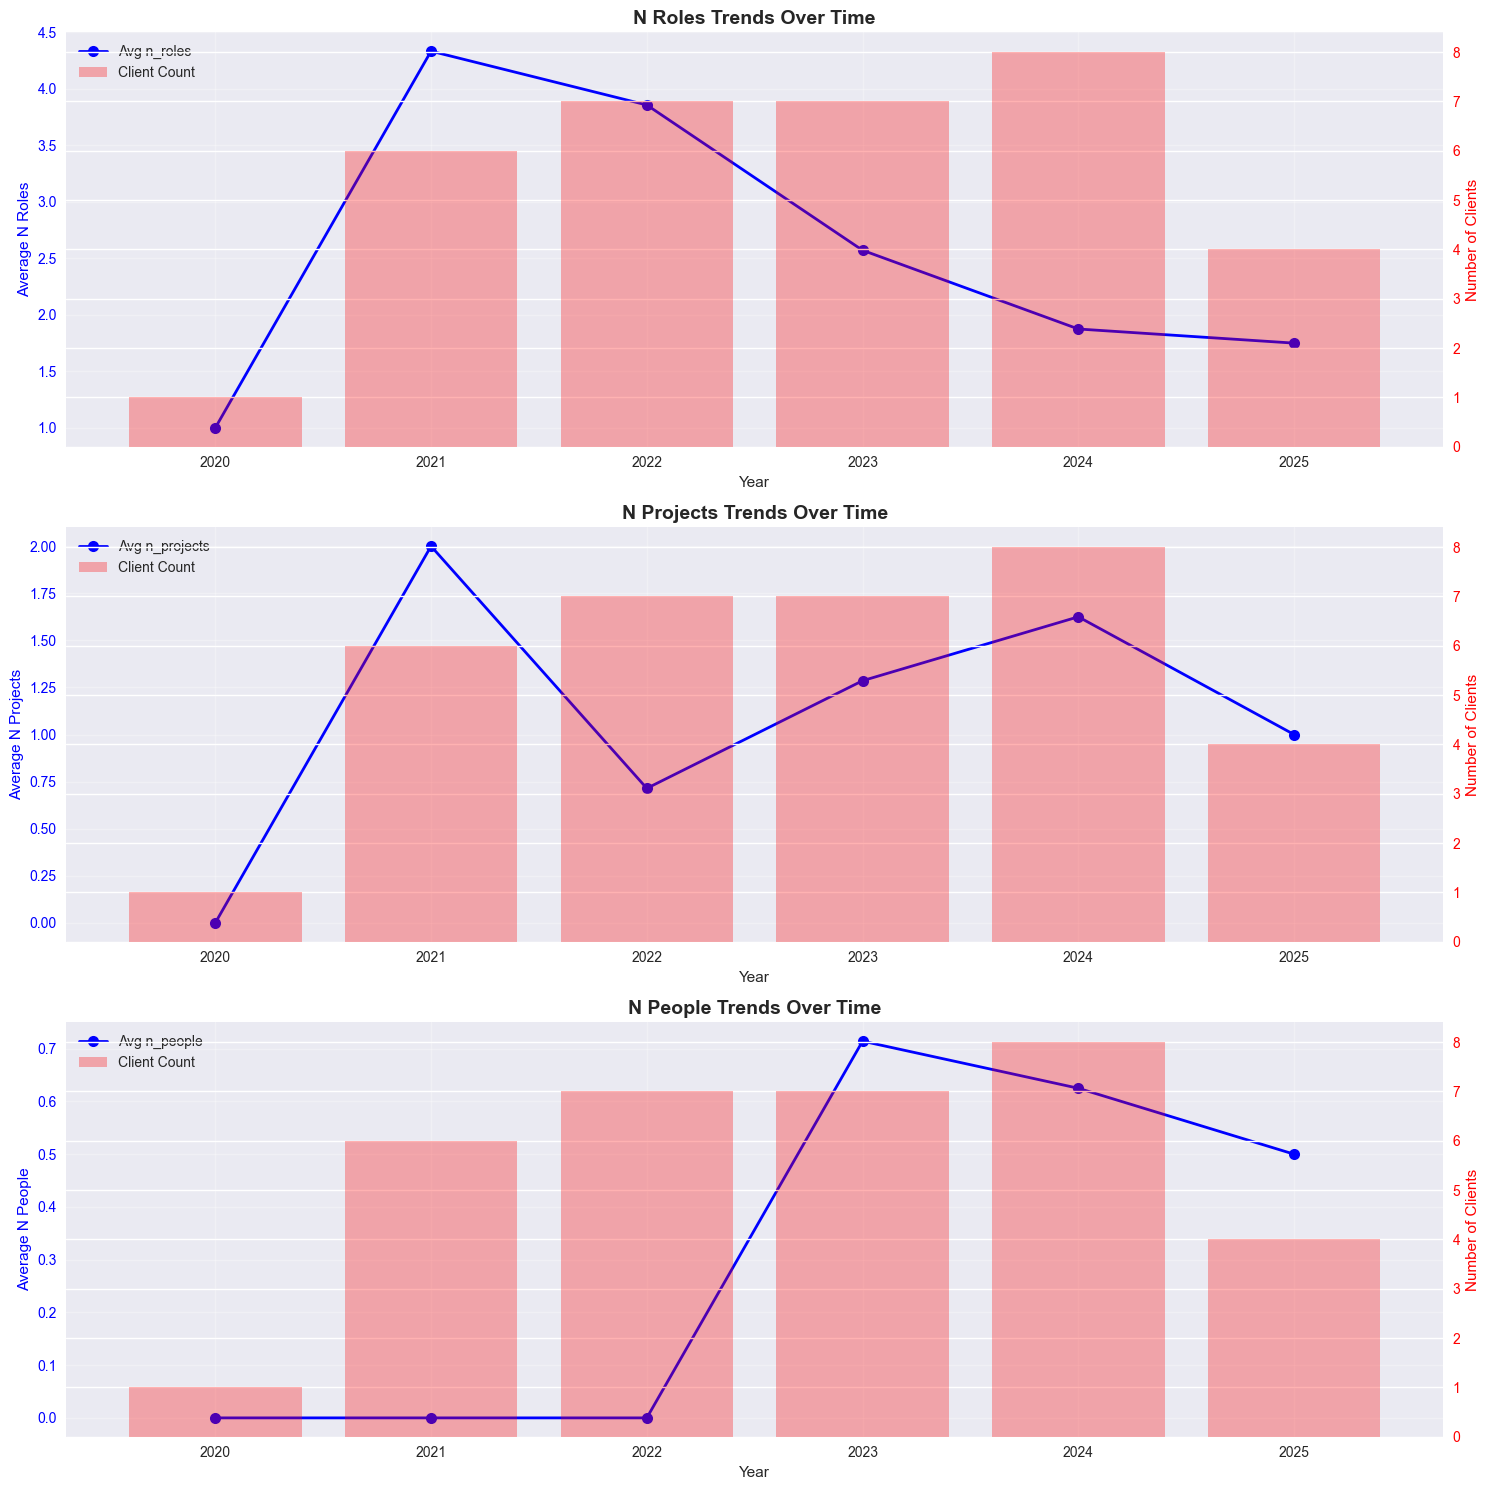


=== KEY INSIGHTS ===
📊 Total clients analyzed: 35
📅 Client acquisition period: 2020-10-01 to 2025-09-04
🏆 Highest n_roles: 12 (Client ID: 47)
📈 Average n_roles per client: 2.8
🏆 Highest n_projects: 6 (Client ID: 47)
📈 Average n_projects per client: 1.3
🏆 Highest n_people: 5 (Client ID: 44)
📈 Average n_people per client: 0.3
📈 Client acquisition CAGR: 32.0%


In [13]:
# Combined Timeline and Metrics Analysis
print("=== TIMELINE + METRICS CORRELATION ===")

if 'started_at_clean' in clients_only.columns and available_metrics:
    # Analyze metrics over time
    timeline_metrics = clients_only.dropna(subset=['started_at_clean']).copy()
    
    if len(timeline_metrics) > 0:
        # Create time-based aggregations
        timeline_metrics['year_started'] = timeline_metrics['started_at_clean'].dt.year
        timeline_metrics['quarter_started'] = timeline_metrics['started_at_clean'].dt.to_period('Q')
        
        # Calculate metrics by year
        yearly_metrics = timeline_metrics.groupby('year_started')[available_metrics].agg(['count', 'mean', 'sum']).round(2)
        
        print(f"\n--- METRICS BY YEAR ---")
        display(yearly_metrics)
        
        # Visualize metrics trends over time
        fig, axes = plt.subplots(len(available_metrics), 1, figsize=(15, 5*len(available_metrics)))
        
        if len(available_metrics) == 1:
            axes = [axes]
        
        for i, metric in enumerate(available_metrics):
            # Plot average metric by year
            yearly_avg = timeline_metrics.groupby('year_started')[metric].mean()
            yearly_count = timeline_metrics.groupby('year_started')[metric].count()
            
            # Create dual axis plot
            ax1 = axes[i]
            ax2 = ax1.twinx()
            
            # Average metric (line)
            line1 = ax1.plot(yearly_avg.index, yearly_avg.values, 'o-', color='blue', 
                           linewidth=2, markersize=8, label=f'Avg {metric}')
            ax1.set_ylabel(f'Average {metric.replace("_", " ").title()}', color='blue')
            ax1.tick_params(axis='y', labelcolor='blue')
            
            # Client count (bars)
            bars = ax2.bar(yearly_count.index, yearly_count.values, alpha=0.3, 
                          color='red', label='Client Count')
            ax2.set_ylabel('Number of Clients', color='red')
            ax2.tick_params(axis='y', labelcolor='red')
            
            ax1.set_xlabel('Year')
            ax1.set_title(f'{metric.replace("_", " ").title()} Trends Over Time', 
                         fontsize=14, fontweight='bold')
            ax1.grid(True, alpha=0.3)
            
            # Combined legend
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        plt.tight_layout()
        plt.show()
        
        # Summary insights
        print(f"\n=== KEY INSIGHTS ===")
        print(f"📊 Total clients analyzed: {len(clients_only)}")
        print(f"📅 Client acquisition period: {timeline_data['started_at_clean'].min().strftime('%Y-%m-%d')} to {timeline_data['started_at_clean'].max().strftime('%Y-%m-%d')}")
        
        for metric in available_metrics:
            top_client_idx = clients_only[metric].idxmax()
            if pd.notna(top_client_idx):
                top_value = clients_only.loc[top_client_idx, metric]
                print(f"🏆 Highest {metric}: {top_value} (Client ID: {top_client_idx})")
            
            avg_value = clients_only[metric].mean()
            print(f"📈 Average {metric} per client: {avg_value:.1f}")
        
        # Growth rate analysis
        if len(yearly_clients) > 1:
            first_year_clients = yearly_clients.iloc[0]
            last_year_clients = yearly_clients.iloc[-1]
            years_span = yearly_clients.index[-1] - yearly_clients.index[0]
            if years_span > 0:
                cagr = ((last_year_clients / first_year_clients) ** (1/years_span) - 1) * 100
                print(f"📈 Client acquisition CAGR: {cagr:.1f}%")
        
else:
    print("❌ Cannot perform timeline-metrics correlation analysis")

In [14]:
# Detailed Client Table with Timeline
print("=== DETAILED CLIENT TIMELINE TABLE ===")

if len(clients_only) > 0:
    # Create a comprehensive client summary table
    client_display_cols = ['started_at_clean'] + available_metrics
    
    # Add client identifier if available
    if 'client_name' in clients_only.columns:
        client_display_cols = ['client_name'] + client_display_cols
    elif 'name' in clients_only.columns:
        client_display_cols = ['name'] + client_display_cols
    
    # Filter columns that exist
    display_cols = [col for col in client_display_cols if col in clients_only.columns]
    
    if display_cols:
        client_summary = clients_only[display_cols].copy()
        
        # Format date if present
        if 'started_at_clean' in client_summary.columns:
            client_summary['started_at_formatted'] = client_summary['started_at_clean'].dt.strftime('%Y-%m-%d')
            client_summary = client_summary.drop('started_at_clean', axis=1)
            client_summary = client_summary.sort_values('started_at_formatted')
        
        print("Top 10 clients by start date:")
        display(client_summary.head(10))
        
        if len(client_summary) > 10:
            print(f"\nMost recent 10 clients:")
            display(client_summary.tail(10))
    
    print(f"\n=== FINAL SUMMARY ===")
    print(f"Total clients with 'Clients' category: {len(clients_only)}")
    if 'started_at_clean' in clients_only.columns:
        valid_dates = clients_only['started_at_clean'].notna().sum()
        print(f"Clients with valid start dates: {valid_dates}")
    
    for metric in available_metrics:
        valid_metrics = clients_only[metric].notna().sum()
        total_metric = clients_only[metric].sum()
        print(f"Clients with valid {metric}: {valid_metrics}, Total {metric}: {total_metric}")

else:
    print("❌ No client data available for analysis")

=== DETAILED CLIENT TIMELINE TABLE ===
Top 10 clients by start date:


,n_roles,n_projects,n_people,started_at_formatted
20,1,0,0,2020-10-01
38,3,0,0,2021-06-21
42,4,2,0,2021-08-01
39,4,2,0,2021-09-01
47,12,6,0,2021-10-04
17,1,1,0,2021-12-06
32,2,1,0,2021-12-07
40,4,1,0,2022-02-21
46,10,1,0,2022-04-01
45,7,1,0,2022-04-18



Most recent 10 clients:


,n_roles,n_projects,n_people,started_at_formatted
26,2,1,0,2024-08-19
37,3,5,0,2024-10-13
25,2,1,1,2024-10-14
22,1,1,1,2024-10-14
30,2,1,0,2025-02-05
27,2,1,0,2025-05-25
29,2,1,0,2025-06-08
19,1,1,2,2025-09-04
10,0,1,0,NaN
36,3,1,0,NaN



=== FINAL SUMMARY ===
Total clients with 'Clients' category: 35
Clients with valid start dates: 33
Clients with valid n_roles: 35, Total n_roles: 97
Clients with valid n_projects: 35, Total n_projects: 45
Clients with valid n_people: 35, Total n_people: 12


In [16]:
# Multi-Level Sankey: Clients -> Projects -> Roles
import plotly.graph_objects as go

print("=== SANKEY DIAGRAM: CLIENTS -> PROJECTS -> ROLES BY YEAR ===")

# Check for required data
if 'clients_only' in locals() and all(c in clients_only.columns for c in ['started_at_clean', 'n_projects', 'n_roles']):
    
    # Prepare the data
    sankey_data = clients_only.copy()
    sankey_data['year'] = sankey_data['started_at_clean'].dt.year
    client_col = 'client_id'

    if client_col in sankey_data.columns:
        # Get the most recent years with data
        recent_years = sorted(sankey_data['year'].dropna().unique(), reverse=True)[:3]
        print(f"✓ Data prepared. Generating diagrams for the most recent years: {recent_years}")

        for year in recent_years:
            print(f"\n--- Generating Sankey for {int(year)} ---")
            
            # Filter data for the year and drop rows with missing values in key columns
            year_data = sankey_data[sankey_data['year'] == year].dropna(subset=[client_col, 'n_projects', 'n_roles'])
            
            if year_data.empty:
                print(f"No complete client data (client, projects, roles) for {int(year)}.")
                continue

            # --- Prepare data for Plotly Sankey ---
            # 1. Create unique labels for all nodes
            client_labels = year_data[client_col].unique()
            project_labels = [f"{int(p)} Projects" for p in sorted(year_data['n_projects'].unique())]
            role_labels = [f"{int(r)} Roles" for r in sorted(year_data['n_roles'].unique())]
            
            # Combine all labels, ensuring no duplicates
            all_labels = list(dict.fromkeys(list(client_labels) + project_labels + role_labels))
            
            # 2. Create a mapping from label to index
            label_to_idx = {label: i for i, label in enumerate(all_labels)}
            
            # 3. Create source, target, and value lists for the links
            source = []
            target = []
            value = []
            
            # Group by client, project count, and role count to aggregate flows
            grouped = year_data.groupby([client_col, 'n_projects', 'n_roles']).size().reset_index(name='count')

            for _, row in grouped.iterrows():
                # Link 1: Client -> Projects
                source.append(label_to_idx[row[client_col]])
                target.append(label_to_idx[f"{int(row['n_projects'])} Projects"])
                value.append(row['count']) # Value is the number of clients in this group

                # Link 2: Projects -> Roles
                source.append(label_to_idx[f"{int(row['n_projects'])} Projects"])
                target.append(label_to_idx[f"{int(row['n_roles'])} Roles"])
                value.append(row['count']) # Value is the number of clients in this group

            # --- Create the Figure ---
            fig = go.Figure(data=[go.Sankey(
                node=dict(
                    pad=25,
                    thickness=20,
                    line=dict(color="black", width=0.5),
                    label=all_labels,
                    color="teal"
                ),
                link=dict(
                    source=source,
                    target=target,
                    value=value
                ))])

            fig.update_layout(
                title_text=f"Client -> Projects -> Roles Flow for New Clients in {int(year)}",
                font_size=12
            )
            fig.show()
            
    else:
        print(f"❌ The specified client column '{client_col}' was not found.")
else:
    print("❌ 'clients_only' DataFrame not found or missing required columns ('started_at_clean', 'n_projects', 'n_roles').")
    print("Please run the previous analysis cells first.")

=== SANKEY DIAGRAM: CLIENTS -> PROJECTS -> ROLES BY YEAR ===
✓ Data prepared. Generating diagrams for the most recent years: [np.float64(2025.0), np.float64(2024.0), np.float64(2023.0)]

--- Generating Sankey for 2025 ---



--- Generating Sankey for 2024 ---



--- Generating Sankey for 2023 ---


In [17]:
# Overall Multi-Level Sankey: Clients -> Projects -> Roles
import plotly.graph_objects as go

print("=== OVERALL SANKEY DIAGRAM: CLIENTS -> PROJECTS -> ROLES ===")

# Check for required data
if 'clients_only' in locals() and all(c in clients_only.columns for c in ['client_id', 'n_projects', 'n_roles']):
    
    # Prepare the data by dropping rows with missing values in key columns
    sankey_data = clients_only.dropna(subset=['client_id', 'n_projects', 'n_roles']).copy()
    client_col = 'client_id'

    if not sankey_data.empty:
        print(f"✓ Data prepared. Generating a single diagram for all {len(sankey_data)} client records.")

        # --- Prepare data for Plotly Sankey ---
        # 1. Create unique labels for all nodes
        client_labels = sankey_data[client_col].unique()
        project_labels = [f"{int(p)} Projects" for p in sorted(sankey_data['n_projects'].unique())]
        role_labels = [f"{int(r)} Roles" for r in sorted(sankey_data['n_roles'].unique())]
        
        # Combine all labels, ensuring no duplicates
        all_labels = list(dict.fromkeys(list(client_labels) + project_labels + role_labels))
        
        # 2. Create a mapping from label to index
        label_to_idx = {label: i for i, label in enumerate(all_labels)}
        
        # 3. Create source, target, and value lists for the links
        source = []
        target = []
        value = []
        
        # Group by client, project count, and role count to aggregate flows
        # The 'count' will represent how many clients share the exact same project/role numbers
        grouped = sankey_data.groupby([client_col, 'n_projects', 'n_roles']).size().reset_index(name='count')

        for _, row in grouped.iterrows():
            # Link 1: Client -> Projects
            source.append(label_to_idx[row[client_col]])
            target.append(label_to_idx[f"{int(row['n_projects'])} Projects"])
            value.append(row['count'])

            # Link 2: Projects -> Roles
            source.append(label_to_idx[f"{int(row['n_projects'])} Projects"])
            target.append(label_to_idx[f"{int(row['n_roles'])} Roles"])
            value.append(row['count'])

        # --- Create the Figure ---
        fig = go.Figure(data=[go.Sankey(
            node=dict(
                pad=25,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=all_labels,
                color="cornflowerblue"
            ),
            link=dict(
                source=source,
                target=target,
                value=value
            ))])

        fig.update_layout(
            title_text="Overall Client -> Projects -> Roles Flow",
            font_size=12,
            height=800 # Adjust height for better readability if there are many clients
        )
        fig.show()
            
    else:
        print("❌ No complete client data (client, projects, roles) available to generate a diagram.")
else:
    print("❌ 'clients_only' DataFrame not found or missing required columns ('client_id', 'n_projects', 'n_roles').")
    print("Please run the previous analysis cells first.")

=== OVERALL SANKEY DIAGRAM: CLIENTS -> PROJECTS -> ROLES ===
✓ Data prepared. Generating a single diagram for all 35 client records.


In [15]:
df_clients[df_clients['n_projects'] == 6]

,client_id,category,industry_id,company_size,company_type,n_roles,n_projects,n_people,started_at,name_anon
47,0b539912-e3de-480a-8e64-1acf6c0b03b3,Clients,f99a9738-1f86-48ec-b212-28ec0ad4c8e4,>250,Private,12,6,0,2021-10-04,Ortega Group


=== N_PROJECTS STATISTICAL ANALYSIS (CLIENTS ONLY) ===

✓ category column found
Original records: 48
Records with category='Clients': 35
Filtered out: 13 non-client records

✓ n_projects column found

=== BASIC STATISTICS ===
Total client records (category='Clients'): 35
Clients with valid n_projects: 35
Clients with missing n_projects: 0

=== DESCRIPTIVE STATISTICS ===
count    35.000000
mean      1.285714
std       1.177521
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       6.000000
Name: n_projects, dtype: float64

Additional metrics:
  Mode (most common): 1
  Range: 6
  Variance: 1.39
  Skewness: 2.84
  Kurtosis: 9.43

=== PERCENTILE BREAKDOWN ===
  10th percentile: 0.4 projects
  25th percentile: 1.0 projects
  50th percentile: 1.0 projects
  75th percentile: 1.0 projects
  90th percentile: 2.0 projects
  95th percentile: 2.9 projects
  99th percentile: 5.7 projects

=== DISTRIBUTION OF n_projects ===
n_projects
0     4
1    24
2     5
5     1
6 

,client_id,n_projects,n_people,n_roles
47,0b539912-e3de-480a-8e64-1acf6c0b03b3,6,0,12
37,122b42da-30b3-8022-88b5-d5212d80755f,5,0,3
39,4845bf38-1d33-4949-a1f3-ade9436679fc,2,0,4
41,afb6524b-9701-418b-aa00-6d1a6b7969d0,2,0,4
42,245f7e77-4e1d-4621-ae0d-932dc78e1f15,2,0,4
43,d6cd8164-a355-4b4a-a506-02eb9b34ba74,2,1,4
44,f63533d5-5060-47e1-99bc-80a305f94471,2,5,6
10,7fa223a8-390d-4d99-8766-51d0c87726bb,1,0,0
11,53354996-d9a0-4312-b5d5-8ecb56a13048,1,0,1
12,e484733b-a243-4358-8def-b422d77cceb2,1,1,1


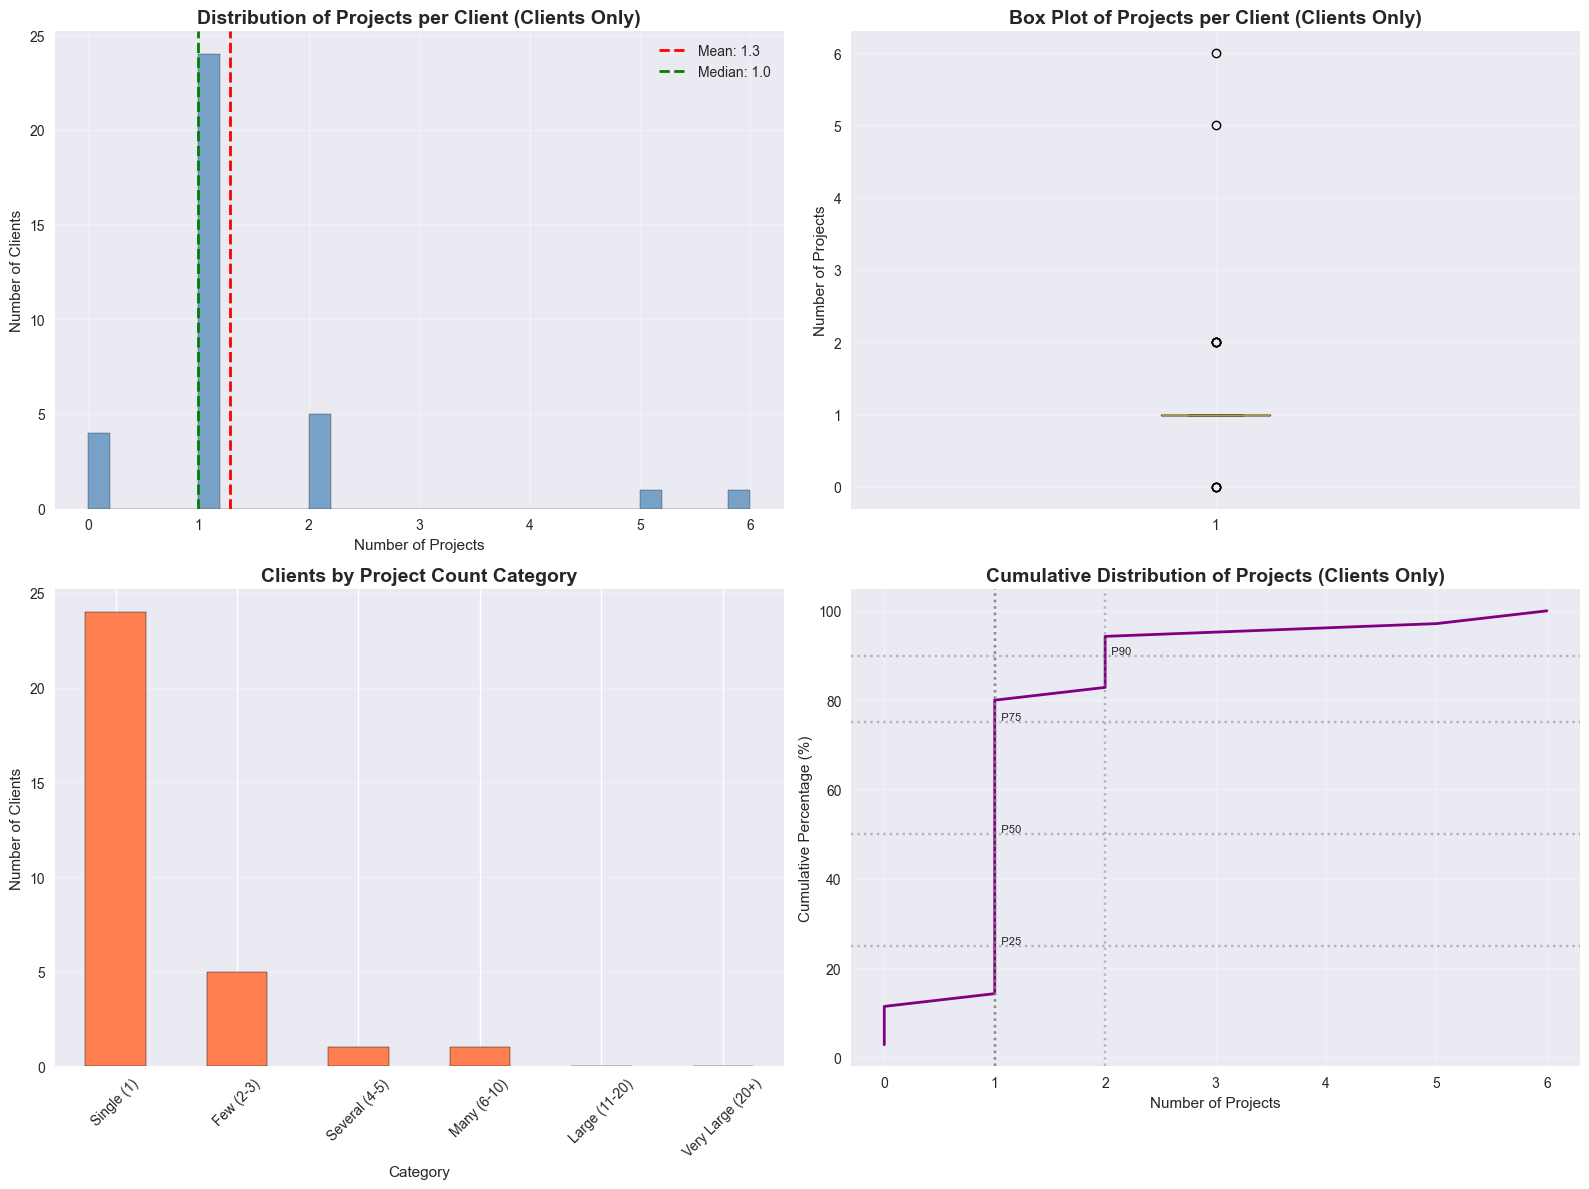


✓ Analysis complete


In [14]:
# Statistical Analysis of n_projects in Client Data (CLIENTS ONLY)
print("=== N_PROJECTS STATISTICAL ANALYSIS (CLIENTS ONLY) ===\n")

# First, filter for only "Clients" category
if 'category' in df_clients.columns:
    print("✓ category column found")
    
    # Filter for only Clients (exclude internal/other categories)
    clients_filtered = df_clients[df_clients['category'] == 'Clients'].copy()
    
    print(f"Original records: {len(df_clients)}")
    print(f"Records with category='Clients': {len(clients_filtered)}")
    print(f"Filtered out: {len(df_clients) - len(clients_filtered)} non-client records")
    
    if 'n_projects' in clients_filtered.columns:
        print("\n✓ n_projects column found")
        
        # Remove any null values for analysis
        n_projects_clean = clients_filtered['n_projects'].dropna()
        
        print(f"\n=== BASIC STATISTICS ===")
        print(f"Total client records (category='Clients'): {len(clients_filtered)}")
        print(f"Clients with valid n_projects: {len(n_projects_clean)}")
        print(f"Clients with missing n_projects: {clients_filtered['n_projects'].isna().sum()}")
        
        # Descriptive statistics
        print(f"\n=== DESCRIPTIVE STATISTICS ===")
        print(n_projects_clean.describe())
        
        print(f"\nAdditional metrics:")
        print(f"  Mode (most common): {n_projects_clean.mode().values[0] if len(n_projects_clean.mode()) > 0 else 'N/A'}")
        print(f"  Range: {n_projects_clean.max() - n_projects_clean.min()}")
        print(f"  Variance: {n_projects_clean.var():.2f}")
        print(f"  Skewness: {n_projects_clean.skew():.2f}")
        print(f"  Kurtosis: {n_projects_clean.kurtosis():.2f}")
        
        # Percentile breakdown
        print(f"\n=== PERCENTILE BREAKDOWN ===")
        percentiles = [10, 25, 50, 75, 90, 95, 99]
        for p in percentiles:
            value = np.percentile(n_projects_clean, p)
            print(f"  {p}th percentile: {value:.1f} projects")
        
        # Distribution of values
        print(f"\n=== DISTRIBUTION OF n_projects ===")
        value_counts = n_projects_clean.value_counts().sort_index()
        print(value_counts.head(20))
        
        # Category breakdown
        print(f"\n=== CLIENT CATEGORIES BY PROJECT COUNT ===")
        clients_temp = clients_filtered.copy()
        clients_temp['project_count_category'] = pd.cut(
            clients_temp['n_projects'],
            bins=[0, 1, 3, 5, 10, 20, float('inf')],
            labels=['Single (1)', 'Few (2-3)', 'Several (4-5)', 'Many (6-10)', 'Large (11-20)', 'Very Large (20+)']
        )
        
        category_counts = clients_temp['project_count_category'].value_counts().sort_index()
        print(category_counts)
        print(f"\nPercentages:")
        print((category_counts / len(clients_filtered) * 100).round(2))
        
        # Clients with zero projects (data quality check)
        zero_projects = clients_filtered[clients_filtered['n_projects'] == 0]
        if len(zero_projects) > 0:
            print(f"\n⚠️  WARNING: {len(zero_projects)} clients have 0 projects ({len(zero_projects)/len(clients_filtered)*100:.2f}%)")
            print("This may indicate data quality issues.")
        
        # Top clients by project count
        print(f"\n=== TOP 10 CLIENTS BY PROJECT COUNT ===")
        top_clients = clients_filtered.nlargest(10, 'n_projects')[['client_id', 'n_projects', 'n_people', 'n_roles']]
        display(top_clients)
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Histogram
        axes[0, 0].hist(n_projects_clean, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        axes[0, 0].axvline(n_projects_clean.mean(), color='red', linestyle='--', linewidth=2, 
                           label=f'Mean: {n_projects_clean.mean():.1f}')
        axes[0, 0].axvline(n_projects_clean.median(), color='green', linestyle='--', linewidth=2, 
                           label=f'Median: {n_projects_clean.median():.1f}')
        axes[0, 0].set_title('Distribution of Projects per Client (Clients Only)', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Number of Projects')
        axes[0, 0].set_ylabel('Number of Clients')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Box plot
        axes[0, 1].boxplot(n_projects_clean, vert=True)
        axes[0, 1].set_title('Box Plot of Projects per Client (Clients Only)', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Number of Projects')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Category bar chart
        category_counts.plot(kind='bar', ax=axes[1, 0], color='coral', edgecolor='black')
        axes[1, 0].set_title('Clients by Project Count Category', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Category')
        axes[1, 0].set_ylabel('Number of Clients')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # 4. Cumulative distribution
        sorted_projects = n_projects_clean.sort_values()
        cumulative_pct = np.arange(1, len(sorted_projects) + 1) / len(sorted_projects) * 100
        axes[1, 1].plot(sorted_projects, cumulative_pct, color='purple', linewidth=2)
        axes[1, 1].set_title('Cumulative Distribution of Projects (Clients Only)', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Number of Projects')
        axes[1, 1].set_ylabel('Cumulative Percentage (%)')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Add reference lines at key percentiles
        for p in [25, 50, 75, 90]:
            value = np.percentile(n_projects_clean, p)
            axes[1, 1].axhline(y=p, color='gray', linestyle=':', alpha=0.5)
            axes[1, 1].axvline(x=value, color='gray', linestyle=':', alpha=0.5)
            axes[1, 1].text(value, p, f'  P{p}', fontsize=8, va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n✓ Analysis complete")
        
    else:
        print("❌ n_projects column not found in filtered clients")
        print(f"Available columns: {list(clients_filtered.columns)}")
        
else:
    print("❌ category column not found in df_clients")
    print(f"Available columns: {list(df_clients.columns)}")
    print("\nCannot filter for 'Clients' category. Using all data instead.")

In [16]:
clients_filtered.n_projects.sum()

np.int64(45)